# Capstone Project 1-In-Depth Analysis

## 1.  Import modules and datasets

### 1.1 Import relevant modules

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1.2 Import dataset

In [75]:
df=pd.read_csv('blackfriday_clean.csv',index_col=0)
df.head()

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase,product_category_num
0,1000001,P00069042,F,0-17,10,A,2,0,3,0,0,8370,1
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200,3
2,1000001,P00087842,F,0-17,10,A,2,0,12,0,0,1422,1
3,1000001,P00085442,F,0-17,10,A,2,0,12,14,0,1057,2
4,1000002,P00285442,M,55+,16,C,4+,0,8,0,0,7969,1


### 1.3 Preprocess dataset for purchase level prediction 

In [76]:
df_pa=df.pivot_table(values='purchase',index=['user_id','gender','age','occupation','city_category','stay_in_current_city_years','marital_status'],aggfunc=np.sum)
df_pa=df_pa.reset_index()
df_pa.head()

,user_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,purchase
0,1000001,F,0-17,10,A,2,0,333481
1,1000002,M,55+,16,C,4+,0,810353
2,1000003,M,26-35,15,A,3,0,341635
3,1000004,M,46-50,7,B,2,1,205987
4,1000005,M,26-35,20,A,1,1,821001


In order to conduct the Chi-square test of independence between purchase levels and different parameters, total purchase amounts are categorized into different categories. In this case, categories are chosen based on every 10000 interval of purchase amounts, 0, 1, 2, 3, 4 correspond to purchase amounts of 0-1,000,000, 1,000,000-2,000,000, 2,000,000-3,000,000, 3,000,000-4,000,000, above 4,000,000, respectively.

0    4270
1    1008
2     375
3     139
4      99
Name: purchase level, dtype: int64


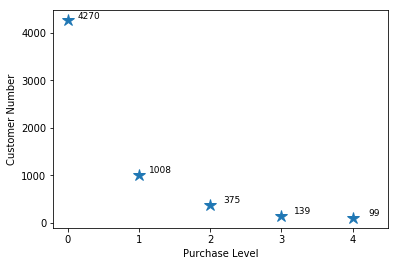

In [77]:
df_pa['purchase level']=[v//1000000 if v<4000000 else 4 for v in df_pa['purchase']]
print(df_pa['purchase level'].value_counts())
df_pa_count=df_pa['purchase level'].value_counts()
_=plt.plot(df_pa_count.index,df_pa_count.values,marker='*',markersize=12,linestyle='none')
_=plt.xticks(df_pa_count.index)
_=plt.xlim(right=4.5)
_=plt.xlabel('Purchase Level')
_=plt.ylabel('Customer Number')
for a,b in zip(df_pa_count.index,df_pa_count.values):
    _=plt.text(a+0.3, b, '%d' % b, ha='center', va= 'bottom',fontsize=9)

In [78]:
df_pa.head()

,user_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,purchase,purchase level
0,1000001,F,0-17,10,A,2,0,333481,0
1,1000002,M,55+,16,C,4+,0,810353,0
2,1000003,M,26-35,15,A,3,0,341635,0
3,1000004,M,46-50,7,B,2,1,205987,0
4,1000005,M,26-35,20,A,1,1,821001,0


In [79]:
df_pa=df_pa.drop(['purchase'],axis=1)
df_pa.head()

,user_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,purchase level
0,1000001,F,0-17,10,A,2,0,0
1,1000002,M,55+,16,C,4+,0,0
2,1000003,M,26-35,15,A,3,0,0
3,1000004,M,46-50,7,B,2,1,0
4,1000005,M,26-35,20,A,1,1,0


### 1.4 Preprocess dataset for product category prediction

8     2024
1     2002
5      938
15     243
16     205
2      111
14      93
11      66
6       44
4       43
10      37
3       24
17      19
13      12
9        8
7        7
12       6
18       2
Name: product_category, dtype: int64


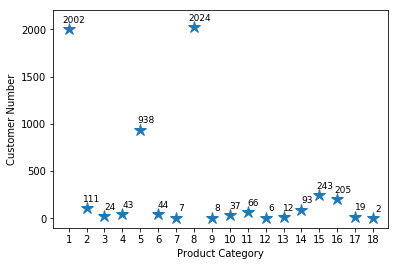

In [80]:
df_pc1=pd.melt(df,id_vars=['user_id','gender','age','occupation','city_category','stay_in_current_city_years','marital_status','purchase'],value_vars=['product_category_1','product_category_2','product_category_3'])
df_pc1=df_pc1.pivot_table(values='purchase',index=['user_id','gender','age','occupation','city_category','stay_in_current_city_years','marital_status','value'],aggfunc=np.sum)
df_pc1=df_pc1.reset_index()
df_pc1=df_pc1[(df_pc1.value!=0)]
df_pc2=df_pc1.pivot_table(values='purchase',index=['user_id','gender','age','occupation','city_category','stay_in_current_city_years','marital_status'],aggfunc=np.max)
df_pc2=df_pc2.reset_index()
df_pc2.columns=['user_id','gender','age','occupation','city_category','stay_in_current_city_years','marital_status','max_purchase']
df_pc1.columns=['user_id','gender','age','occupation','city_category','stay_in_current_city_years','marital_status','product_category','purchase']
df_pc=pd.merge(df_pc1,df_pc2,on=['user_id','gender','age','occupation','city_category','stay_in_current_city_years','marital_status'])
df_pc=df_pc[df_pc.purchase==df_pc.max_purchase]
df_pc['user_id'].value_counts()
df_pc=df_pc[(df_pc.user_id!=1004553) & (df_pc.user_id!=1004597) & (df_pc.user_id!=1000250) & (df_pc.user_id!=1005383) & (df_pc.user_id!=1005904) & (df_pc.user_id!=1000041) & (df_pc.user_id!=1005320)]
print(df_pc['product_category'].value_counts())
df_pc_count=df_pc['product_category'].value_counts()
_=plt.plot(df_pc_count.index,df_pc_count.values,marker='*',markersize=12,linestyle='none')
_=plt.xticks(df_pc_count.index)
_=plt.ylim(top=2200)
_=plt.xlabel('Product Category')
_=plt.ylabel('Customer Number')
for a,b in zip(df_pc_count.index,df_pc_count.values):
    _=plt.text(a+0.3, b+50, '%d' % b, ha='center', va= 'bottom',fontsize=9)

In [81]:
df_pc=df_pc.drop(['purchase','max_purchase'],axis=1)
df_pc.head()

,user_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category
3,1000001,F,0-17,10,A,2,0,4
17,1000002,M,55+,16,C,4+,0,8
27,1000003,M,26-35,15,A,3,0,1
38,1000004,M,46-50,7,B,2,1,1
55,1000005,M,26-35,20,A,1,1,8


### 1.5 Change categorical values into numerical values

In [82]:
df_pa['gender1']=[0 if v=='F' else 1 for v in df_pa['gender']]

age1=[]
for row in df_pa['age']:
    if row=='0-17':
        age1.append(0)
    elif row=='18-25':
        age1.append(1)
    elif row=='26-35':
        age1.append(2)
    elif row=='36-45':
        age1.append(3)
    elif row=='46-50':
        age1.append(4)
    elif row=='51-55':
        age1.append(5)
    elif row=='55+':
        age1.append(6)
df_pa['age1']=age1

city1=[]
for row in df_pa['city_category']:
    if row=='A':
        city1.append(0)
    if row=='B':
        city1.append(1)
    if row=='C':
        city1.append(2)
df_pa['city1']=city1

df_pa['stay_in_current_city_years1']=[4 if v=='4+' else v for v in df_pa['stay_in_current_city_years']]
df_pa=df_pa.drop(['gender','age','city_category','stay_in_current_city_years'],axis=1)
df_pa.columns=['user_id','occupation','marital_status','purchase_level','gender','age','city','years']
df_pa['years']=df_pa['years'].astype(int)
df_pa.head()

,user_id,occupation,marital_status,purchase_level,gender,age,city,years
0,1000001,10,0,0,0,0,0,2
1,1000002,16,0,0,1,6,2,4
2,1000003,15,0,0,1,2,0,3
3,1000004,7,1,0,1,4,1,2
4,1000005,20,1,0,1,2,0,1


In [83]:
df_pc['gender1']=[0 if v=='F' else 1 for v in df_pc['gender']]

age1=[]
for row in df_pc['age']:
    if row=='0-17':
        age1.append(0)
    elif row=='18-25':
        age1.append(1)
    elif row=='26-35':
        age1.append(2)
    elif row=='36-45':
        age1.append(3)
    elif row=='46-50':
        age1.append(4)
    elif row=='51-55':
        age1.append(5)
    elif row=='55+':
        age1.append(6)
df_pc['age1']=age1

city1=[]
for row in df_pc['city_category']:
    if row=='A':
        city1.append(0)
    if row=='B':
        city1.append(1)
    if row=='C':
        city1.append(2)
df_pc['city1']=city1

df_pc['stay_in_current_city_years1']=[4 if v=='4+' else v for v in df_pc['stay_in_current_city_years']]
df_pc=df_pc.drop(['gender','age','city_category','stay_in_current_city_years'],axis=1)
df_pc.columns=['user_id','occupation','marital_status','product_category','gender','age','city','years']
df_pc['years']=df_pc['years'].astype(int)
df_pc.head()

,user_id,occupation,marital_status,product_category,gender,age,city,years
3,1000001,10,0,4,0,0,0,2
17,1000002,16,0,8,1,6,2,4
27,1000003,15,0,1,1,2,0,3
38,1000004,7,1,1,1,4,1,2
55,1000005,20,1,8,1,2,0,1


## 2. In-depth analysis on prediction of product category

### 2.1 Using K-Nearest Neighbors

In [84]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [85]:
X=df_pc.drop(['user_id','product_category'],axis=1).values
y=df_pc['product_category'].values

In [86]:
param_grid={'n_neighbors':np.arange(1,50)}
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=21)
knn=KNeighborsClassifier()
knn_cv=GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,y_train)
y_pred=knn_cv.predict(X_test)
print(knn_cv.best_params_)
print(knn_cv.score(X_test,y_test))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

C:\Users\wanwe\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


{'n_neighbors': 31}
0.3899745114698386
[[258   0   0   0   4   0   0 120   0   0   0   0   0   0   0   0   0]
 [  7   0   0   0   1   0   0  12   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   1   0   0   1   0   0   0   0   0   0   0   0   0]
 [  6   0   0   0   2   0   0   3   0   0   0   0   0   0   0   0   0]
 [126   0   0   0   8   0   0  75   0   0   0   0   0   0   0   0   0]
 [  4   0   0   0   0   0   0   4   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0]
 [187   0   0   0   6   0   0 193   0   0   0   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0]
 [  6   0   0   0   0   0   0   6   0   0   0   0   0   0   0   0   0]
 [ 12   0   0   0   1   0   0   3   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   2   0   0   0   0   0   0   0   0   0]
 [  5   0   0   0   0   0   0  10   0 

C:\Users\wanwe\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### 2.2 Using SVM

In [87]:
from sklearn.svm import SVC
param_grid={'kernel':['linear','rbf','sigmoid'],'gamma':[0.001,0.01,0.1,1],'C':[0.001,0.01,0.1,1,10]}
svclassifier=SVC()
svclassifier_cv=GridSearchCV(svclassifier,param_grid,cv=5)
svclassifier_cv.fit(X_train,y_train)
y_pred=svclassifier_cv.predict(X_test)
print(svclassifier_cv.score(X_test,y_test))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(svclassifier_cv.best_params_)

C:\Users\wanwe\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


0.40696686491079015
[[264   0   0   0   2   0   0 116   0   0   0   0   0   0   0   0   0]
 [  9   0   0   0   1   0   0  10   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   2   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   4   0   0   6   0   0   0   0   0   0   0   0   0]
 [121   0   0   0   3   0   0  85   0   0   0   0   0   0   0   0   0]
 [  4   0   0   0   0   0   0   4   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0]
 [171   0   0   0   3   0   0 212   0   0   0   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0]
 [  5   0   0   0   0   0   0   7   0   0   0   0   0   0   0   0   0]
 [ 11   0   0   0   0   0   0   5   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   2   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   2   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0  14   0   0   0   0   0   0

C:\Users\wanwe\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### 2.3 Using Random Forest

In [88]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100,max_depth=5)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(clf.score(X_test,y_test))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(clf.feature_importances_)

0.4154630416312659
[[274   0   0   0   2   0   0 106   0   0   0   0   0   0   0   0   0]
 [  8   0   0   0   1   0   0  11   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   2   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   4   0   0   6   0   0   0   0   0   0   0   0   0]
 [124   0   0   0   3   0   0  82   0   0   0   0   0   0   0   0   0]
 [  4   0   0   0   0   0   0   4   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0]
 [171   0   0   0   3   0   0 212   0   0   0   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0]
 [  6   0   0   0   0   0   0   6   0   0   0   0   0   0   0   0   0]
 [ 13   0   0   0   0   0   0   3   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   2   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   2   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  15   0   0   0   0   0   0 

C:\Users\wanwe\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [89]:
def plot_feature_importances(clf, X_train, y_train=None, 
                             top_n=10, figsize=(8,8), print_table=False, title="Feature Importances"):
    __name__ = "plot_feature_importances"
            
    feat_imp = pd.DataFrame({'importance':clf.feature_importances_})    
    feat_imp['feature'] = X_train.columns
    feat_imp.sort_values(by='importance', ascending=False, inplace=True)
    feat_imp = feat_imp.iloc[:top_n]
    
    feat_imp.sort_values(by='importance', inplace=True)
    feat_imp = feat_imp.set_index('feature', drop=True)
    feat_imp.plot.barh(title=title, figsize=figsize)
    plt.xlabel('Feature Importance Score')
    plt.show()
    
    if print_table:
        from IPython.display import display
        print("Top {} features in descending order of importance".format(top_n))
        display(feat_imp.sort_values(by='importance', ascending=False))
        
    return feat_imp

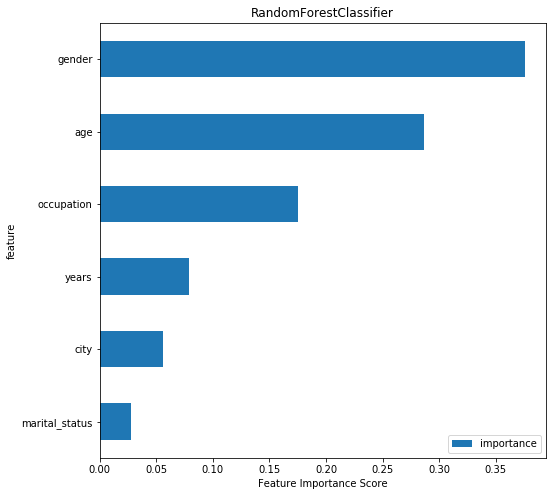

In [90]:
X_train=pd.DataFrame(X_train)
X_train.columns=['occupation','marital_status','gender','age','city','years']
_ = plot_feature_importances(clf, X_train, y_train, top_n=X_train.shape[1], title=clf.__class__.__name__)

### 2.4 Feature engineering

In [91]:
import seaborn as sns

# Plots the disribution of a variable colored by value of the target
def kde_target(var_name, df):
    
    # Calculate the correlation coefficient between the new variable and the target
    corr = df['product_category'].corr(df[var_name])
    
    # Calculate medians for different product categories
    product=[]
    for i in range(1,19):
        product_median = df.ix[df['product_category'] == i, var_name].median()
        product.append(product_median)
    
    plt.figure(figsize = (12, 6))
    
    # Plot the distribution for different product categories
    for i in range(1,19):
        sns.kdeplot(df.ix[df['product_category'] == i, var_name], label = str(i))
    
    # label the plot
    plt.xlabel(var_name); plt.ylabel('Density'); plt.title('%s Distribution' % var_name)
    
    # print out the correlation
    print('The correlation between %s and product category is %0.4f' % (var_name, corr))
    # Print out median value
    for i in range(1,19):
        print('Median value for %d = %0.4f' % (i,product[i-1]))

C:\Users\wanwe\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if sys.path[0] == '':
C:\Users\wanwe\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\wanwe\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * wei

The correlation between occupation and product category is -0.0042
Median value for 1 = 7.0000
Median value for 2 = 8.0000
Median value for 3 = 5.0000
Median value for 4 = 9.0000
Median value for 5 = 7.0000
Median value for 6 = 7.0000
Median value for 7 = 9.0000
Median value for 8 = 7.0000
Median value for 9 = 2.0000
Median value for 10 = 6.0000
Median value for 11 = 6.0000
Median value for 12 = 7.0000
Median value for 13 = 1.0000
Median value for 14 = 6.0000
Median value for 15 = 12.0000
Median value for 16 = 7.0000
Median value for 17 = 12.0000
Median value for 18 = 7.5000
The correlation between marital_status and product category is 0.0356
Median value for 1 = 0.0000
Median value for 2 = 0.0000
Median value for 3 = 0.0000
Median value for 4 = 0.0000
Median value for 5 = 0.0000
Median value for 6 = 0.0000
Median value for 7 = 1.0000
Median value for 8 = 0.0000
Median value for 9 = 0.5000
Median value for 10 = 1.0000
Median value for 11 = 0.0000
Median value for 12 = 1.0000
Median va

C:\Users\wanwe\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\wanwe\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\wanwe\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


The correlation between gender and product category is -0.1367
Median value for 1 = 1.0000
Median value for 2 = 1.0000
Median value for 3 = 1.0000
Median value for 4 = 0.0000
Median value for 5 = 1.0000
Median value for 6 = 1.0000
Median value for 7 = 0.0000
Median value for 8 = 1.0000
Median value for 9 = 1.0000
Median value for 10 = 1.0000
Median value for 11 = 1.0000
Median value for 12 = 0.5000
Median value for 13 = 0.5000
Median value for 14 = 0.0000
Median value for 15 = 1.0000
Median value for 16 = 1.0000
Median value for 17 = 1.0000
Median value for 18 = 1.0000
The correlation between age and product category is 0.1315
Median value for 1 = 2.0000
Median value for 2 = 3.0000
Median value for 3 = 2.0000
Median value for 4 = 1.0000
Median value for 5 = 2.0000
Median value for 6 = 2.0000
Median value for 7 = 4.0000
Median value for 8 = 3.0000
Median value for 9 = 1.5000
Median value for 10 = 3.0000
Median value for 11 = 2.0000
Median value for 12 = 3.0000
Median value for 13 = 4.50

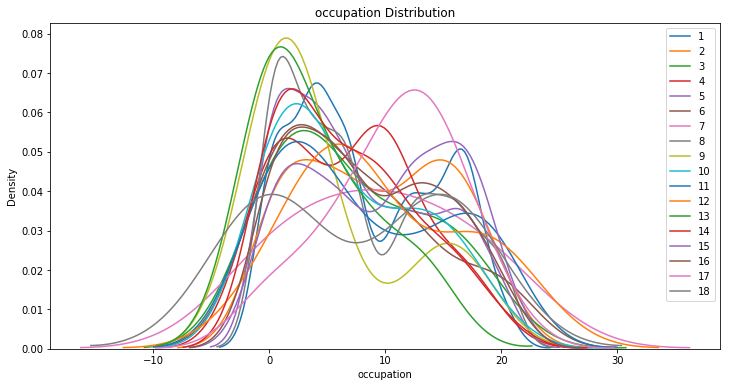

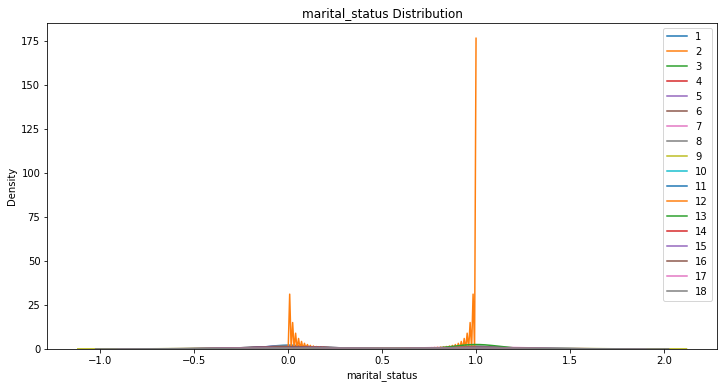

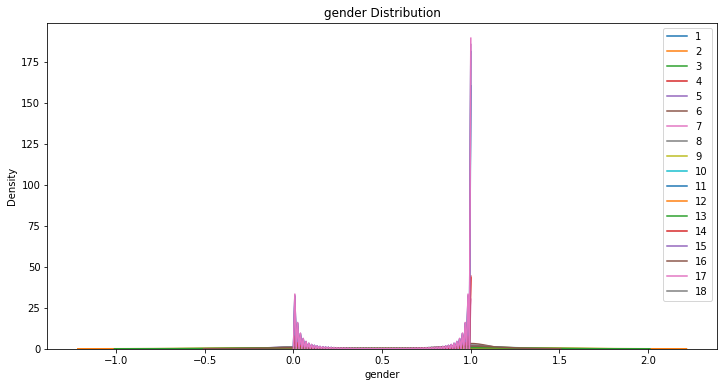

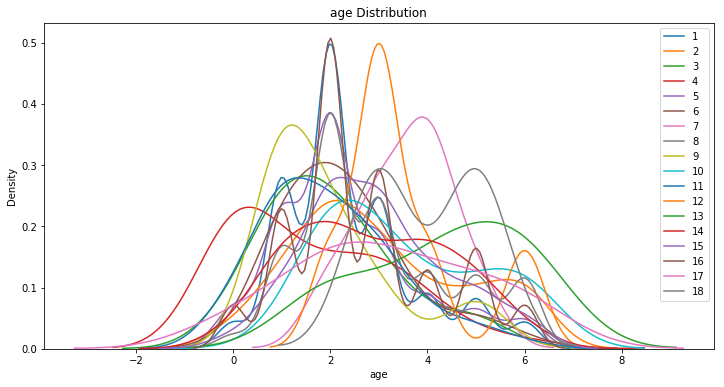

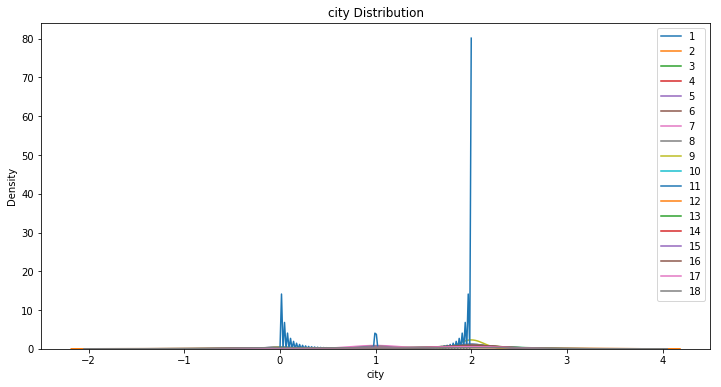

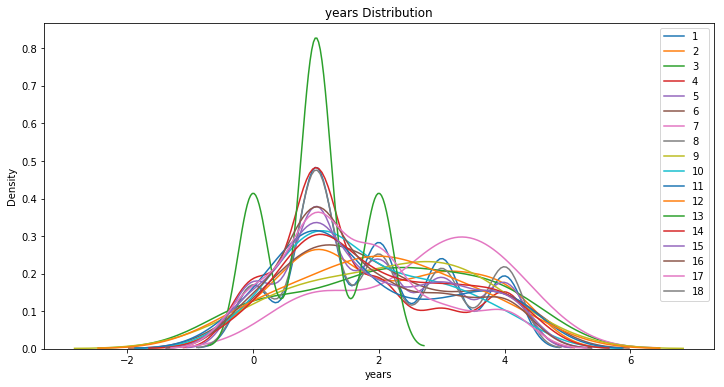

In [92]:
kde_target('occupation', df_pc)
kde_target('marital_status', df_pc)
kde_target('gender', df_pc)
kde_target('age', df_pc)
kde_target('city', df_pc)
kde_target('years', df_pc)

### 2.5 Remove product categories with less than 100 data points

In [93]:
df_pc=df_pc[(df_pc.product_category==1)|(df_pc.product_category==2)|(df_pc.product_category==5)|(df_pc.product_category==8)|(df_pc.product_category==15)|(df_pc.product_category==16)]
print(df_pc.shape)
X=df_pc.drop(['user_id','product_category'],axis=1).values
y=df_pc['product_category'].values
param_grid={'n_neighbors':np.arange(1,50)}
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=21)
knn=KNeighborsClassifier()
knn_cv=GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,y_train)
y_pred=knn_cv.predict(X_test)
print(knn_cv.best_params_)
print(knn_cv.score(X_test,y_test))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

(5523, 8)
{'n_neighbors': 23}
0.448868778280543
[[273   0   6 133   0   0]
 [ 16   0   0   5   0   0]
 [ 93   0   8  79   0   0]
 [190   0   7 215   0   0]
 [ 26   0   0  17   0   0]
 [ 23   0   0  14   0   0]]
             precision    recall  f1-score   support

          1       0.44      0.66      0.53       412
          2       0.00      0.00      0.00        21
          5       0.38      0.04      0.08       180
          8       0.46      0.52      0.49       412
         15       0.00      0.00      0.00        43
         16       0.00      0.00      0.00        37

avg / total       0.40      0.45      0.39      1105



C:\Users\wanwe\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### 2.6 Remove product categories with less than 200 data points

In [94]:
df_pc=df_pc[(df_pc.product_category==1)|(df_pc.product_category==5)|(df_pc.product_category==8)|(df_pc.product_category==15)|(df_pc.product_category==16)]
print(df_pc.shape)
X=df_pc.drop(['user_id','product_category'],axis=1).values
y=df_pc['product_category'].values
param_grid={'n_neighbors':np.arange(1,50)}
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=21)
knn=KNeighborsClassifier()
knn_cv=GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,y_train)
y_pred=knn_cv.predict(X_test)
print(knn_cv.best_params_)
print(knn_cv.score(X_test,y_test))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

(5412, 8)
{'n_neighbors': 43}
0.420129270544783
[[257   2 140   0   0]
 [108   3  67   0   0]
 [217   5 195   0   0]
 [ 31   0  22   0   0]
 [ 21   0  15   0   0]]
             precision    recall  f1-score   support

          1       0.41      0.64      0.50       399
          5       0.30      0.02      0.03       178
          8       0.44      0.47      0.46       417
         15       0.00      0.00      0.00        53
         16       0.00      0.00      0.00        36

avg / total       0.37      0.42      0.36      1083



C:\Users\wanwe\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### 2.7 Remove product categories with less than 300 data points

In [95]:
df_pc=df_pc[(df_pc.product_category==1)|(df_pc.product_category==5)|(df_pc.product_category==8)]
print(df_pc.shape)
X=df_pc.drop(['user_id','product_category'],axis=1).values
y=df_pc['product_category'].values
param_grid={'n_neighbors':np.arange(1,50)}
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=21)
knn=KNeighborsClassifier()
knn_cv=GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,y_train)
y_pred=knn_cv.predict(X_test)
print(knn_cv.best_params_)
print(knn_cv.score(X_test,y_test))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

(4964, 8)
{'n_neighbors': 38}
0.47230614300100704
[[260   2 124]
 [122   4  76]
 [200   0 205]]
             precision    recall  f1-score   support

          1       0.45      0.67      0.54       386
          5       0.67      0.02      0.04       202
          8       0.51      0.51      0.51       405

avg / total       0.52      0.47      0.42       993



## 3. In-depth analysis on prediction of purchase level

### 3.1 Using K-Nearest Neighbors

In [96]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [97]:
X=df_pa.drop(['user_id','purchase_level'],axis=1).values
y=df_pa['purchase_level'].values

In [98]:
param_grid={'n_neighbors':np.arange(1,50)}
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=21)
knn=KNeighborsClassifier()
knn_cv=GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,y_train)
y_pred=knn_cv.predict(X_test)
print(knn_cv.score(X_test,y_test))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(knn_cv.best_params_)

0.73960983884648
[[872   2   0   0   0]
 [196   0   0   0   0]
 [ 71   0   0   0   0]
 [ 21   1   0   0   0]
 [ 16   0   0   0   0]]
             precision    recall  f1-score   support

          0       0.74      1.00      0.85       874
          1       0.00      0.00      0.00       196
          2       0.00      0.00      0.00        71
          3       0.00      0.00      0.00        22
          4       0.00      0.00      0.00        16

avg / total       0.55      0.74      0.63      1179

{'n_neighbors': 40}


C:\Users\wanwe\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### 3.2 Using SVM

In [99]:
from sklearn.svm import SVC
param_grid={'kernel':['linear','rbf','sigmoid'],'gamma':[0.001,0.01,0.1,1],'C':[0.001,0.01,0.1,1,10]}
svclassifier=SVC()
svclassifier_cv=GridSearchCV(svclassifier,param_grid,cv=5)
svclassifier_cv.fit(X_train,y_train)
y_pred=svclassifier_cv.predict(X_test)
print(svclassifier_cv.score(X_test,y_test))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(svclassifier_cv.best_params_)

0.741306191687871
[[874   0   0   0   0]
 [196   0   0   0   0]
 [ 71   0   0   0   0]
 [ 22   0   0   0   0]
 [ 16   0   0   0   0]]
             precision    recall  f1-score   support

          0       0.74      1.00      0.85       874
          1       0.00      0.00      0.00       196
          2       0.00      0.00      0.00        71
          3       0.00      0.00      0.00        22
          4       0.00      0.00      0.00        16

avg / total       0.55      0.74      0.63      1179

{'C': 0.001, 'gamma': 0.001, 'kernel': 'linear'}


C:\Users\wanwe\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### 3.3 Using Random Forest

In [100]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100,max_depth=5)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(clf.score(X_test,y_test))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(clf.feature_importances_)

0.741306191687871
[[874   0   0   0   0]
 [196   0   0   0   0]
 [ 71   0   0   0   0]
 [ 22   0   0   0   0]
 [ 16   0   0   0   0]]
             precision    recall  f1-score   support

          0       0.74      1.00      0.85       874
          1       0.00      0.00      0.00       196
          2       0.00      0.00      0.00        71
          3       0.00      0.00      0.00        22
          4       0.00      0.00      0.00        16

avg / total       0.55      0.74      0.63      1179

[0.09928724 0.01986796 0.07865378 0.12187763 0.62840606 0.05190733]


C:\Users\wanwe\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


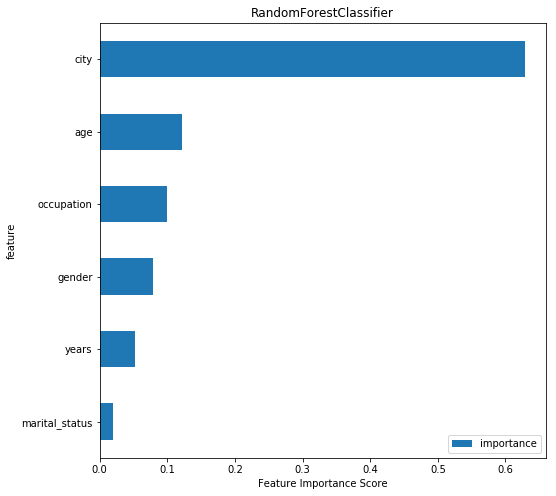

In [101]:
X_train=pd.DataFrame(X_train)
X_train.columns=['occupation','marital_status','gender','age','city','years']
_ = plot_feature_importances(clf, X_train, y_train, top_n=X_train.shape[1], title=clf.__class__.__name__)

### 3.4 Feature engineering

In [106]:
# Plots the disribution of a variable colored by value of the target
def kde_target1(var_name, df):
    
    # Calculate the correlation coefficient between the new variable and the target
    corr = df['purchase_level'].corr(df[var_name])
    
    # Calculate medians for different product categories
    product=[]
    for i in range(5):
        product_median = df.ix[df['purchase_level'] == i, var_name].median()
        product.append(product_median)
    
    plt.figure(figsize = (12, 6))
    
    # Plot the distribution for different product categories
    for i in range(5):
        sns.kdeplot(df.ix[df['purchase_level'] == i, var_name], label = str(i))
    
    # label the plot
    plt.xlabel(var_name); plt.ylabel('Density'); plt.title('%s Distribution' % var_name)
    
    # print out the correlation
    print('The correlation between %s and product category is %0.4f' % (var_name, corr))
    # Print out median value
    for i in range(5):
        print('Median value for %d = %0.4f' % (i,product[i]))

C:\Users\wanwe\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.
C:\Users\wanwe\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\wanwe\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.ad

The correlation between occupation and product category is -0.0118
Median value for 0 = 7.0000
Median value for 1 = 7.0000
Median value for 2 = 7.0000
Median value for 3 = 4.0000
Median value for 4 = 6.0000
The correlation between marital_status and product category is -0.0157
Median value for 0 = 0.0000
Median value for 1 = 0.0000
Median value for 2 = 0.0000
Median value for 3 = 0.0000
Median value for 4 = 0.0000
The correlation between gender and product category is 0.0940
Median value for 0 = 1.0000
Median value for 1 = 1.0000
Median value for 2 = 1.0000
Median value for 3 = 1.0000
Median value for 4 = 1.0000
The correlation between age and product category is -0.0609
Median value for 0 = 2.0000
Median value for 1 = 2.0000
Median value for 2 = 2.0000
Median value for 3 = 2.0000
Median value for 4 = 2.0000
The correlation between city and product category is -0.3293
Median value for 0 = 2.0000
Median value for 1 = 1.0000
Median value for 2 = 1.0000
Median value for 3 = 1.0000
Median 

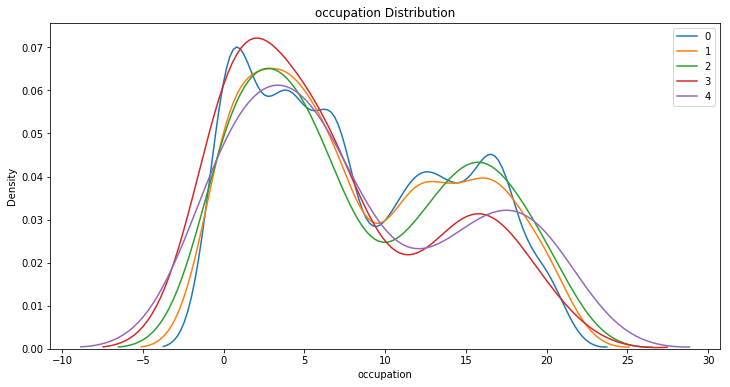

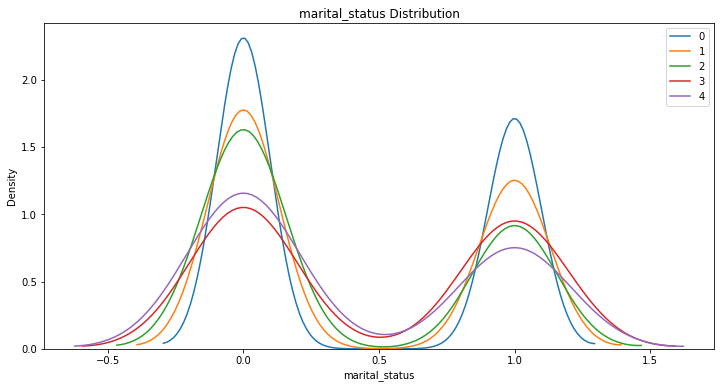

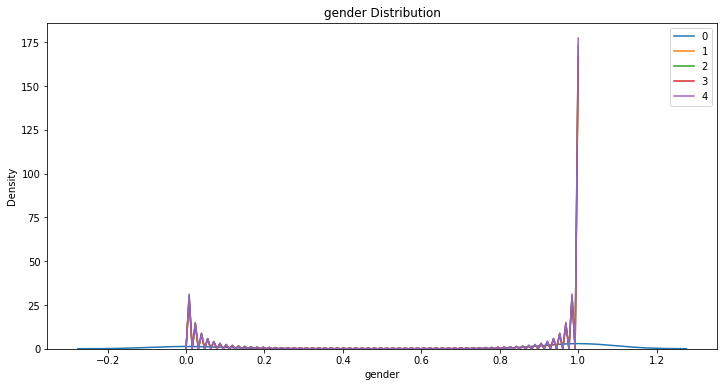

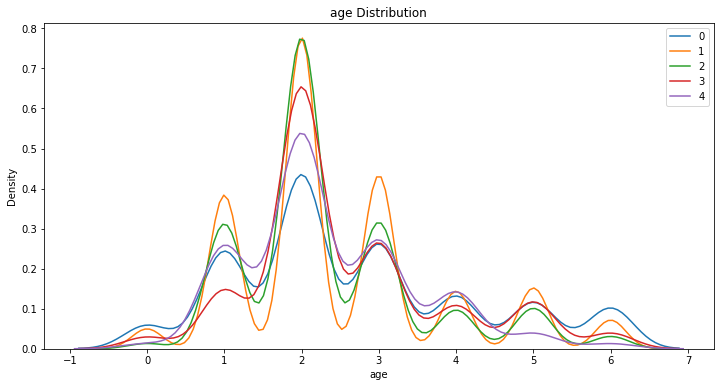

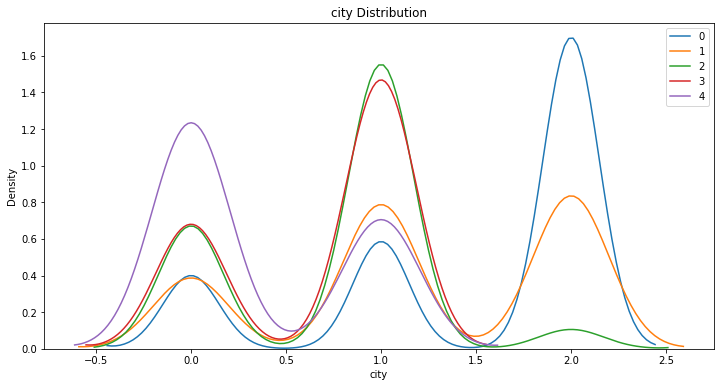

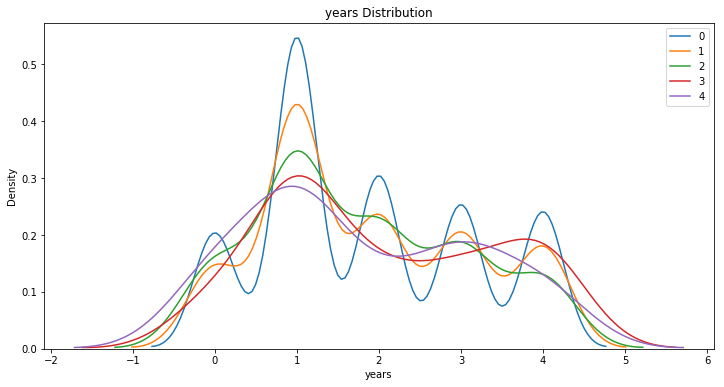

In [107]:
kde_target1('occupation', df_pa)
kde_target1('marital_status', df_pa)
kde_target1('gender', df_pa)
kde_target1('age', df_pa)
kde_target1('city', df_pa)
kde_target1('years', df_pa)

## 4. Conclusion

Two classifications are predicted through machine learning techniques: one is product category that one customer spends most money on, the other is purchase level of one customer. The purchase level is defined based on total purchase amounts, 0, 1, 2, 3, 4 correspond to purchase amounts of 0-1,000,000, 1,000,000-2,000,000, 2,000,000-3,000,000, 3,000,000-4,000,000, above 4,000,000, respectively.

Product category is predicted with accuracy of 0.39 using K-Nearest Neighbors, 0.41 using SVM, 0.42 using Random Forest. Purchase level is predicted with accuracy of 0.74 using K-Nearest Neighbors, 0.74 using SVM, 0.74 using Random Forest.
Data is very unbalanced regarding prediction of product category, there are totally 18 product categories, 2024 customers spend most money on category 8, 2002 customers spend most money on category 1, among the other 16 categories, 12 categories are selected by less than 100 customers. Accuracy is increased from 0.42 to 0.45 by removing product categories with less than 100 data points, to 0.47 by removing product categories with less than 300 data points.

The other reason for low accuracy of predicting product category is limited number of features with weak correlation, there are only 6 features. The order of features based on importance is: gender, age, occupation, years living in current city, city, marital status. The most important feature has importance score as 0.38, the least important feature has importance score as 0.03. For prediction of purchase level, the order of features based on importance is: city, age, occupation, gender, years living in current city, marital status. The most important feature has importance score as 0.63, the least important feature has importance score as 0.02.